In [1]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['name'] == 'Brazil']
type(world)

geopandas.geodataframe.GeoDataFrame

In [3]:
df_func = pd.read_csv(r'BD Tratado\func.csv', sep = ';')
df_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MATRÍCULA  5345 non-null   int64 
 1   end        5345 non-null   object
 2   LAT        5345 non-null   object
 3   LNG        5345 non-null   object
dtypes: int64(1), object(3)
memory usage: 167.2+ KB


In [4]:
df_func['LAT'] = df_func['LAT'].map(lambda x: x.replace('.',',',1)).map(lambda x: x.replace('.','')).map(lambda x: x.replace(',','.'))
df_func['LAT'] = df_func['LAT'].map(lambda x: float(x)).map(lambda x: x if x > -100 else x/10)
df_func['LNG'] = df_func['LNG'].map(lambda x: x.replace('.',',',1)).map(lambda x: x.replace('.','')).map(lambda x: x.replace(',','.'))
df_func['LNG'] = df_func['LNG'].map(lambda x: float(x)).map(lambda x: x if x > -100 else x/10)
df_func

,MATRÍCULA,end,LAT,LNG
0,10438,"AVENIDA NAÇÕES UNIDAS - 8º ANDAR, 7815 - PINHE...",-23.563579,-46.691607
1,10515,"RUA NORMA PIERUCCINI GIANNOTTI, 327 - BARRA FU...",-23.523333,-46.653695
2,10479,"Rua Alexandre Dumas, 2200 - Chacara Santo Anto...",-23.627644,-46.710725
3,10393,"RUA NORMA PIERUCCINI GIANNOTTI, 327 - BARRA FU...",-23.523333,-46.653695
4,11879,"RUA NORMA PIERUCCINI GIANNOTTI, 327 - BARRA FU...",-23.523333,-46.653695
...,...,...,...,...
5340,236804,"RUA APIACAS, 85 - VILA POMPEIA SAO PAULO-SP",-23.533371,-4.667555
5341,236805,"Rua Francisco Manuel da Cruz, 11 - Cidade Indu...",-25.577658,-49.646396
5342,236806,"Rua Francisco Manuel da Cruz, 11 - Cidade Indu...",-25.577658,-49.646396
5343,236807,"RUA JULIO CARMO, 251 - CIDADE NOVA RIO DE JANE...",-22.910493,-43.200970


In [28]:
df_func_geo = gpd.GeoDataFrame(df_func, geometry=gpd.points_from_xy(df_func.LNG, df_func.LAT))
df_func_geo = df_func_geo.drop(['LAT','LNG'],axis=1)
df_func_geo

,MATRÍCULA,end,geometry
0,10438,"AVENIDA NAÇÕES UNIDAS - 8º ANDAR, 7815 - PINHE...",POINT (-46.69161 -23.56358)
1,10515,"RUA NORMA PIERUCCINI GIANNOTTI, 327 - BARRA FU...",POINT (-46.65369 -23.52333)
2,10479,"Rua Alexandre Dumas, 2200 - Chacara Santo Anto...",POINT (-46.71072 -23.62764)
3,10393,"RUA NORMA PIERUCCINI GIANNOTTI, 327 - BARRA FU...",POINT (-46.65369 -23.52333)
4,11879,"RUA NORMA PIERUCCINI GIANNOTTI, 327 - BARRA FU...",POINT (-46.65369 -23.52333)
...,...,...,...
5340,236804,"RUA APIACAS, 85 - VILA POMPEIA SAO PAULO-SP",POINT (-4.66755 -23.53337)
5341,236805,"Rua Francisco Manuel da Cruz, 11 - Cidade Indu...",POINT (-49.64640 -25.57766)
5342,236806,"Rua Francisco Manuel da Cruz, 11 - Cidade Indu...",POINT (-49.64640 -25.57766)
5343,236807,"RUA JULIO CARMO, 251 - CIDADE NOVA RIO DE JANE...",POINT (-43.20097 -22.91049)


In [6]:
df_func_geo = sjoin(df_func_geo, world, how='inner')
df_func_geo.shape

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


(4197, 9)

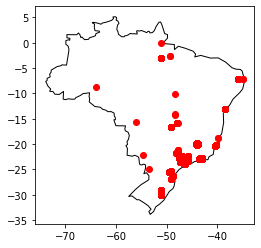

In [7]:
ax = world.plot(
    color='white', edgecolor='black')
df_func_geo.plot(ax=ax, color='red')
plt.show()

In [8]:
df_pess = pd.read_csv(r'BD Tratado\pess.csv', sep = ';')
df_pess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MATRÍCULA  5456 non-null   int64 
 1   end        5456 non-null   object
 2   LAT        5456 non-null   object
 3   LNG        5456 non-null   object
dtypes: int64(1), object(3)
memory usage: 170.6+ KB


In [9]:
df_pess['LAT'] = df_pess['LAT'].map(lambda x: x.replace('.',',',1)).map(lambda x: x.replace('.','')).map(lambda x: x.replace(',','.'))
df_pess['LAT'] = df_pess['LAT'].map(lambda x: float(x)).map(lambda x: x if x > -100 else x/10)
df_pess['LNG'] = df_pess['LNG'].map(lambda x: x.replace('.',',',1)).map(lambda x: x.replace('.','')).map(lambda x: x.replace(',','.'))
df_pess['LNG'] = df_pess['LNG'].map(lambda x: float(x)).map(lambda x: x if x > -100 else x/10)
df_pess

,MATRÍCULA,end,LAT,LNG
0,10438,"RUA Andre Casado, 315 Cpos da Escolastica São ...",-23.541312,-46.689550
1,10515,"RUA Expedito Rezende L, 12 - Q C Centro Rio de...",-22.864110,-43.476026
2,10479,"RUA José Amancio Ferreira, 27 Jardim Kuabara T...",-23.604492,-46.756298
3,10393,"RUA Gal Auto, 165/705 - 165/705 Cidade Baixa P...",-30.034864,-51.231844
4,11879,"RUA Alvaro Gonçalves Jr, 330 - Bl B Ap 08 Parq...",-23.225139,-45.903298
...,...,...,...,...
5451,236804,"RUA Canarios, 100 Cantinho do Céu São Paulo SP...",-23.744532,-46.657651
5452,236805,"RUA Anibal Khury, 400 Bugre Balsa Nova PR",-25.500201,-49.622487
5453,236806,"RUA Galdino Chaves, 416 Jardim Serrinha Balsa ...",-25.586638,-49.633912
5454,236807,"RUA Pastor Francisco Soren, 211 - Casa Braz de...",-22.835318,-43.300269


In [10]:
df_pess_geo = gpd.GeoDataFrame(df_pess, geometry=gpd.points_from_xy(df_pess.LNG, df_pess.LAT))
df_pess_geo = df_pess_geo.drop(['LAT','LNG'],axis=1)
df_pess_geo

,MATRÍCULA,end,geometry
0,10438,"RUA Andre Casado, 315 Cpos da Escolastica São ...",POINT (-46.68955 -23.54131)
1,10515,"RUA Expedito Rezende L, 12 - Q C Centro Rio de...",POINT (-43.47603 -22.86411)
2,10479,"RUA José Amancio Ferreira, 27 Jardim Kuabara T...",POINT (-46.75630 -23.60449)
3,10393,"RUA Gal Auto, 165/705 - 165/705 Cidade Baixa P...",POINT (-51.23184 -30.03486)
4,11879,"RUA Alvaro Gonçalves Jr, 330 - Bl B Ap 08 Parq...",POINT (-45.90330 -23.22514)
...,...,...,...
5451,236804,"RUA Canarios, 100 Cantinho do Céu São Paulo SP...",POINT (-46.65765 -23.74453)
5452,236805,"RUA Anibal Khury, 400 Bugre Balsa Nova PR",POINT (-49.62249 -25.50020)
5453,236806,"RUA Galdino Chaves, 416 Jardim Serrinha Balsa ...",POINT (-49.63391 -25.58664)
5454,236807,"RUA Pastor Francisco Soren, 211 - Casa Braz de...",POINT (-43.30027 -22.83532)


In [11]:
df_pess_geo = sjoin(df_pess_geo, world, how='inner')
df_pess_geo.shape

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


(4156, 9)

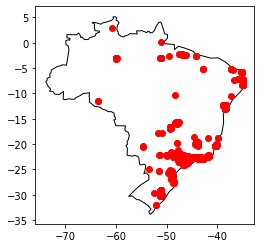

In [12]:
ax = world.plot(
    color='white', edgecolor='black')
df_pess_geo.plot(ax=ax, color='red')
plt.show()

In [35]:
df_distancia = df_pess_geo.merge(df_func_geo, on = ['MATRÍCULA'], suffixes = ('_residencia', '_trabalho'))
df_distancia = df_distancia[['MATRÍCULA', 'geometry_residencia','geometry_trabalho']]
df_distancia = gpd.GeoDataFrame(df_distancia, crs="EPSG:4326")
df_distancia.head()

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


,MATRÍCULA,geometry_residencia,geometry_trabalho
0,10438,POINT (-46.68955 -23.54131),POINT (-46.69161 -23.56358)
1,10515,POINT (-43.47603 -22.86411),POINT (-46.65369 -23.52333)
2,10479,POINT (-46.75630 -23.60449),POINT (-46.71072 -23.62764)
3,10393,POINT (-51.23184 -30.03486),POINT (-46.65369 -23.52333)
4,11879,POINT (-45.90330 -23.22514),POINT (-46.65369 -23.52333)


In [36]:
df_distancia['dist'] = df_distancia['geometry_residencia'].distance(df_distancia['geometry_trabalho'])
df_distancia.head()

,MATRÍCULA,geometry_residencia,geometry_trabalho,dist
0,10438,POINT (-46.68955 -23.54131),POINT (-46.69161 -23.56358),0.022361
1,10515,POINT (-43.47603 -22.86411),POINT (-46.65369 -23.52333),3.245328
2,10479,POINT (-46.75630 -23.60449),POINT (-46.71072 -23.62764),0.051117
3,10393,POINT (-51.23184 -30.03486),POINT (-46.65369 -23.52333),7.959867
4,11879,POINT (-45.90330 -23.22514),POINT (-46.65369 -23.52333),0.807474


In [37]:
df_func[df_func['MATRÍCULA'] == 10438]


,MATRÍCULA,end,LAT,LNG,geometry
0,10438,"AVENIDA NAÇÕES UNIDAS - 8º ANDAR, 7815 - PINHE...",-23.563579,-46.691607,POINT (-46.69161 -23.56358)


In [34]:
df_pess[df_pess['MATRÍCULA'] == 10438]


,MATRÍCULA,end,LAT,LNG,geometry
0,10438,"RUA Andre Casado, 315 Cpos da Escolastica São ...",-23.541312,-46.68955,POINT (-46.68955 -23.54131)
